In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score

# Carrengar dataframes da série temporal e predição

In [17]:
df = pd.read_csv("dataset/fortaleza.csv", index_col="SE")
predict_py = pd.read_csv("predicoes/predicao-py.csv")
predict_r = pd.read_csv("predicoes/predicao-r.csv")

predict_py.head()

,Unnamed: 0,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
0,0,1,2025-01-05,79.43528,-206.01628,-107.211464,266.08203,364.88684
1,1,1,2025-01-12,108.73296,-357.06160,-195.833740,413.29965,574.52750
2,2,1,2025-01-19,140.82236,-477.15207,-263.249400,544.89410,758.79680
3,3,1,2025-01-26,182.57920,-571.18490,-310.280640,675.43900,936.34330
4,4,1,2025-02-02,215.11630,-671.53910,-364.636500,794.86910,1101.77170


In [18]:
predict_r.head()

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
0,110.801038,-76.321656,297.923733,-175.378427,396.980504
1,119.741424,-185.574549,425.057396,-347.199062,586.681909
2,137.766128,-267.260633,542.792889,-481.668849,757.201105
3,164.287041,-329.695633,658.269715,-591.194264,919.768346
4,200.196273,-380.833941,781.226488,-688.412757,1088.805304


# Selecionar dados de teste

In [27]:
df["ds"] = pd.to_datetime(df["ds"])
y_validation = df[ df.ds.dt.year == 2025 ]
y_validation.head()

,ds,y,unique_id
SE,,,
202520,2025-05-11,16,1
202519,2025-05-04,70,1
202518,2025-04-27,109,1
202517,2025-04-20,122,1
202516,2025-04-13,114,1


In [22]:
predict_py.head()

,Unnamed: 0,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
0,0,1,2025-01-05,79.43528,-206.01628,-107.211464,266.08203,364.88684
1,1,1,2025-01-12,108.73296,-357.06160,-195.833740,413.29965,574.52750
2,2,1,2025-01-19,140.82236,-477.15207,-263.249400,544.89410,758.79680
3,3,1,2025-01-26,182.57920,-571.18490,-310.280640,675.43900,936.34330
4,4,1,2025-02-02,215.11630,-671.53910,-364.636500,794.86910,1101.77170


In [25]:
print(predict_py.shape, y_validation.shape)

(52, 8) (19, 3)


# Gráficos

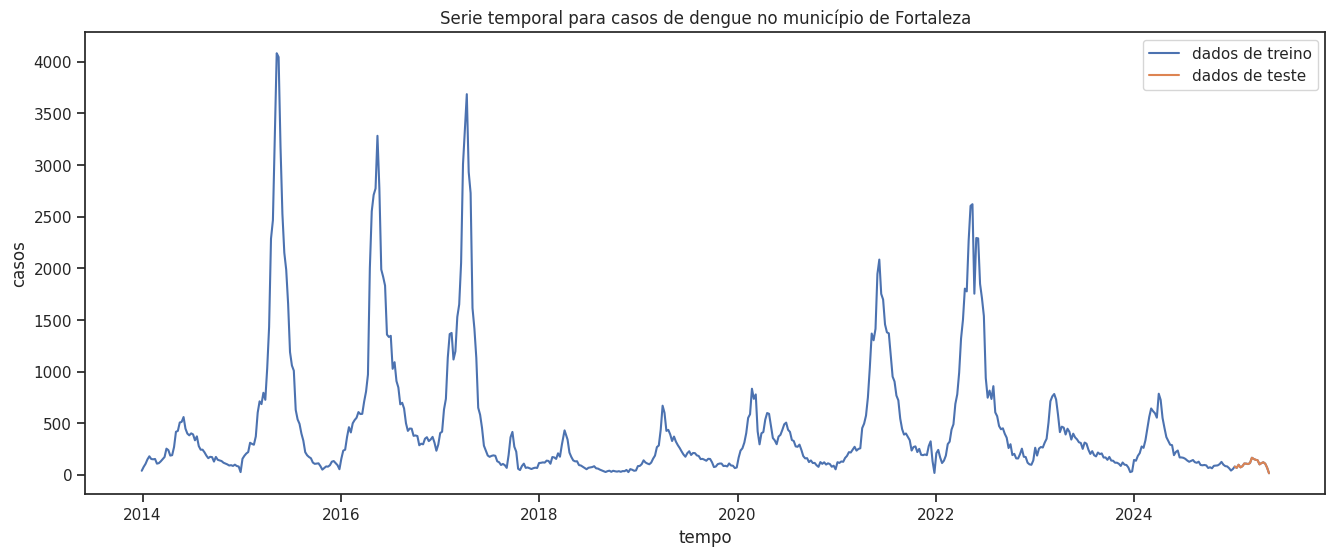

In [23]:
plt.figure("Série temporal completa", figsize=(16,6))
sns.set_theme(style="ticks")

sns.lineplot(data=df, x="ds", y="y", label="dados de treino")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de teste")

plt.title("Serie temporal para casos de dengue no município de Fortaleza")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

In [36]:
# Ordenando os dataframes
y_validation = y_validation.sort_values(by="ds")
predict_py = predict_py.sort_values(by="ds")

# Deixando ambos "ds" no mesmo tipo
predict_py["ds"] = pd.to_datetime(predict_py["ds"])
predict_r["ds"] = predict_py["ds"]

In [30]:
y_validation.head()

,ds,y,unique_id
SE,,,
202502,2025-01-05,81,1
202503,2025-01-12,68,1
202504,2025-01-19,98,1
202505,2025-01-26,73,1
202506,2025-02-02,84,1


In [31]:
predict_py.head()

,Unnamed: 0,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
0,0,1,2025-01-05,79.43528,-206.01628,-107.211464,266.08203,364.88684
1,1,1,2025-01-12,108.73296,-357.06160,-195.833740,413.29965,574.52750
2,2,1,2025-01-19,140.82236,-477.15207,-263.249400,544.89410,758.79680
3,3,1,2025-01-26,182.57920,-571.18490,-310.280640,675.43900,936.34330
4,4,1,2025-02-02,215.11630,-671.53910,-364.636500,794.86910,1101.77170


In [38]:
predict_r.head()

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95,ds
0,110.801038,-76.321656,297.923733,-175.378427,396.980504,2025-01-05
1,119.741424,-185.574549,425.057396,-347.199062,586.681909,2025-01-12
2,137.766128,-267.260633,542.792889,-481.668849,757.201105,2025-01-19
3,164.287041,-329.695633,658.269715,-591.194264,919.768346,2025-01-26
4,200.196273,-380.833941,781.226488,-688.412757,1088.805304,2025-02-02


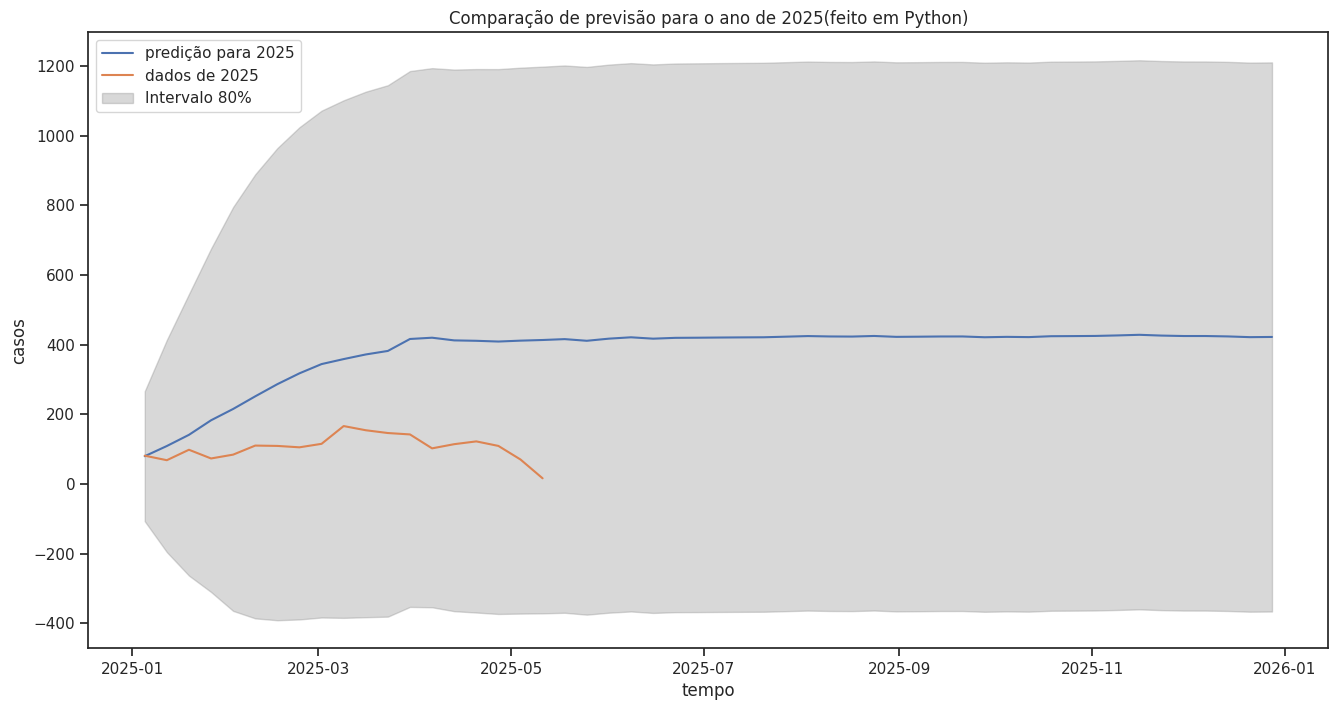

In [41]:
plt.figure("Comparação", figsize=[16,8])

sns.lineplot(data=predict_py, x="ds", y="AutoARIMA", label="predição para 2025")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de 2025")

plt.fill_between(predict_py["ds"], predict_py["AutoARIMA-lo-80"], predict_py["AutoARIMA-hi-80"], color="gray", alpha=0.3, label="Intervalo 80%")

plt.title("Comparação de previsão para o ano de 2025(feito em Python)")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

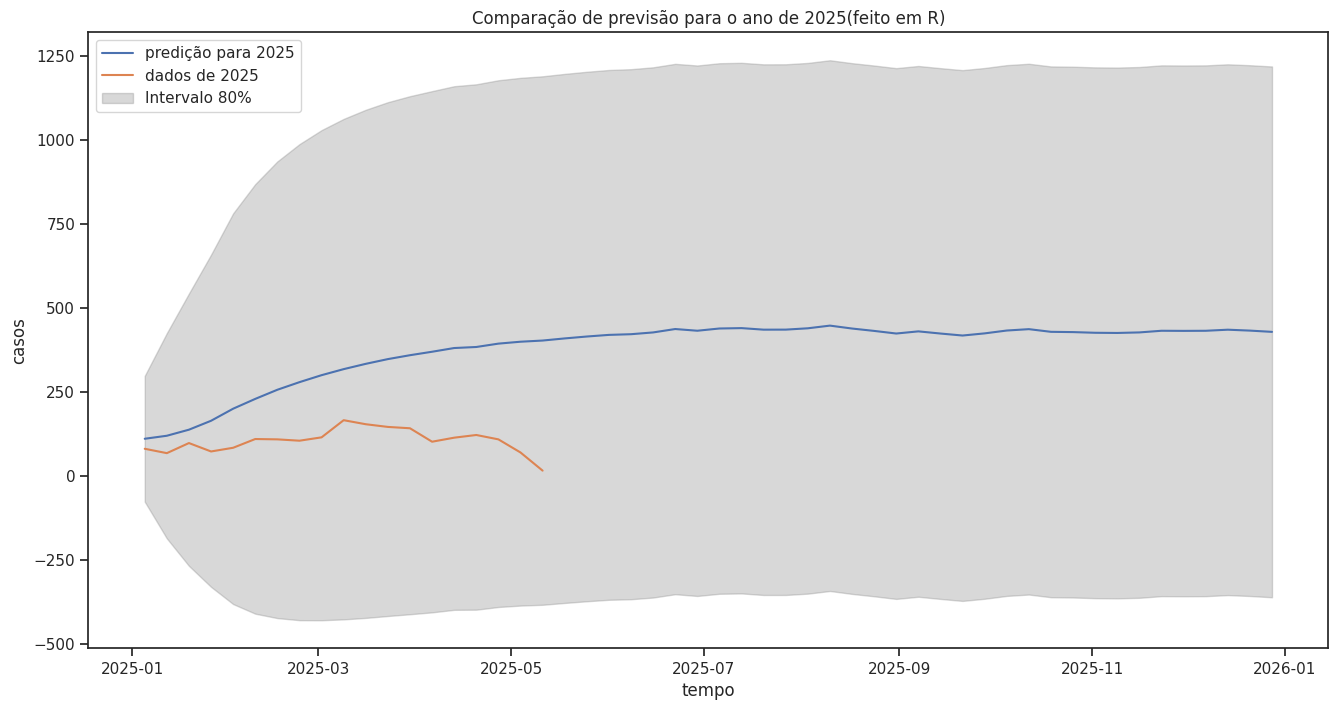

In [40]:
plt.figure("Comparação", figsize=[16,8])

sns.lineplot(data=predict_r, x="ds", y="Point.Forecast", label="predição para 2025")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de 2025")

plt.fill_between(predict_r["ds"], predict_r["Lo.80"], predict_r["Hi.80"], color="gray", alpha=0.3, label="Intervalo 80%")

plt.title("Comparação de previsão para o ano de 2025(feito em R)")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

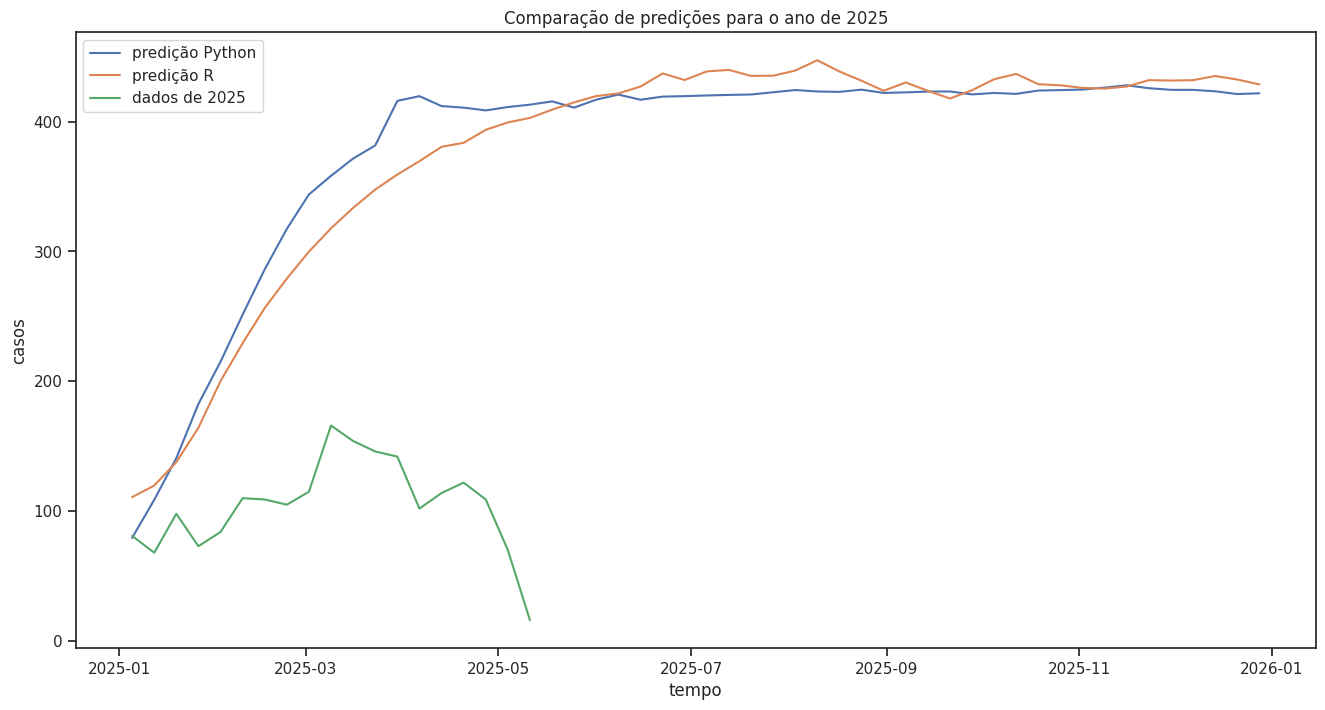

In [44]:
plt.figure("Comparação", figsize=[16,8])

sns.lineplot(data=predict_py, x="ds", y="AutoARIMA", label="predição Python")
sns.lineplot(data=predict_r, x="ds", y="Point.Forecast", label="predição R")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de 2025")

plt.title("Comparação de predições para o ano de 2025")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()